In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

C:\Users\riaz\.conda\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\riaz\.conda\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\riaz\.conda\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\riaz\.conda\envs\python-cvcourse\lib\site-pack

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train = X_train/255
X_test = X_test/255

from tensorflow.keras.utils import to_categorical

y_test_category = to_categorical(y_test,10)
y_train_category = to_categorical(y_train,10)

In [4]:
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.reshape(60000,28,28,1)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [6]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [10]:
model.fit(X_train,y_train_category,epochs=20,callbacks=[early_stop],validation_data=(X_test,y_test_category),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 59s 979us/step - loss: 0.1422 - acc: 0.9573 - val_loss: 0.0543 - val_acc: 0.9821
Epoch 2/20
60000/60000 [==============================] - 58s 972us/step - loss: 0.0490 - acc: 0.9847 - val_loss: 0.0371 - val_acc: 0.9869
Epoch 3/20
60000/60000 [==============================] - 59s 987us/step - loss: 0.0320 - acc: 0.9900 - val_loss: 0.0480 - val_acc: 0.9834
Epoch 4/20
60000/60000 [==============================] - 57s 958us/step - loss: 0.0204 - acc: 0.9932 - val_loss: 0.0404 - val_acc: 0.9876


In [11]:
losses = pd.DataFrame(model.history.history)

Text(0, 0.5, 'Loss')

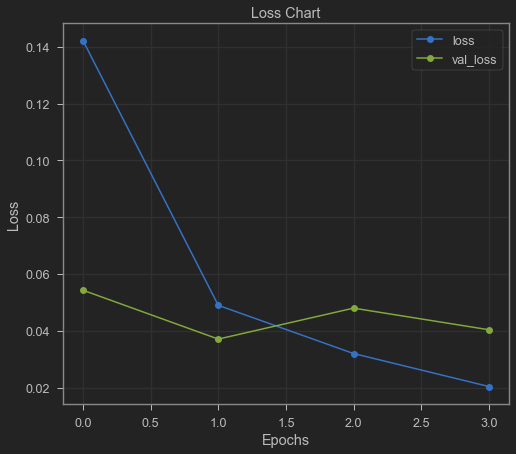

In [12]:
losses[['loss','val_loss']].plot(marker='o',grid=True)
plt.title('Loss Chart')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

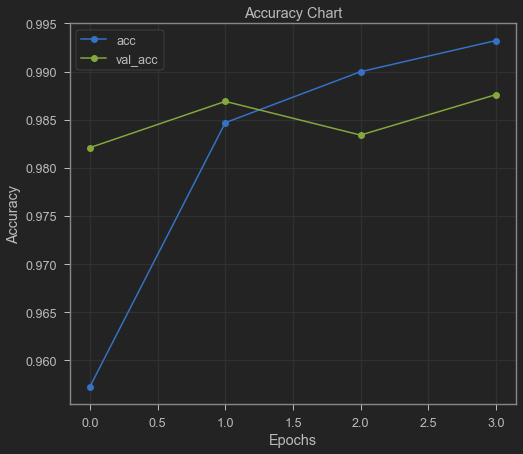

In [13]:
losses[['acc','val_acc']].plot(marker='o',grid=True)
plt.title('Accuracy Chart')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [14]:
from tensorflow.keras.models import load_model

In [15]:
model.save('my_mnist_model.h5')

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 977    0    0    0    0    1    1    0    0    1]
 [   0 1129    1    0    0    1    3    1    0    0]
 [   1    1 1012    2    1    0    3    5    6    1]
 [   0    0    1  995    0    9    0    2    2    1]
 [   0    1    0    0  958    0   10    0    0   13]
 [   1    0    0    1    0  888    1    0    1    0]
 [   3    1    0    0    1    2  950    0    1    0]
 [   0    0    5    1    0    0    0 1014    1    7]
 [   4    1    2    2    0    3    0    3  954    5]
 [   0    0    0    1    3    2    1    3    0  999]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      1.00      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99 

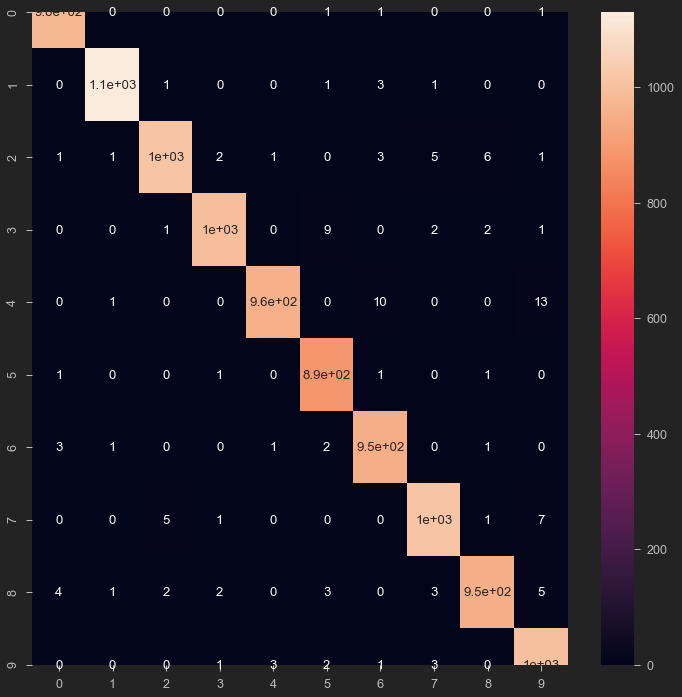

In [23]:
df = pd.DataFrame(confusion_matrix(y_test,predictions))
plt.figure(figsize=(12,12))
sns.heatmap(data=df,annot=True)
